In [25]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Point, Polygon
import os 
from pathlib import Path
import re

In [26]:
# get path to project root directory
project_root = Path.cwd().parents[0]

# build path to input folder
data_external = project_root/"data"/"external"

# build path to output folder
data_processed = project_root/"data"/"processed"

In [27]:
# set target crs
target_crs = 32637

# load in camps geojson
camps = gpd.read_file(data_processed/"idp_sites_long_wgs1984.geojson").to_crs(epsg = target_crs)

# load in regions geojson
regions = gpd.read_file(data_external/'eth_admin1.geojson').to_crs(epsg = target_crs)

In [28]:
regions['adm1_name'] = regions['adm1_name'].replace({
    'Benishangul Gumz': 'Benishangul-Gumuz',
    'South West Ethiopia': 'South West',
    'SNNP': 'Southern'
})

In [29]:
camp_counts = camps.groupby('SiteID').agg('first').set_crs(epsg = target_crs)
camp_counts                             

,SiteName,RegionName,OpenDate,CloseDate,SurveyRound,SurveyDate,SiteType,IsSiteOpen,TotPop,TotHH,DispReason,geometry
SiteID,,,,,,,,,,,,
AA101,Gotara,Addis Ababa,2017-09-22 00:00:00.000,2019-07-13,R11,2018-05-09,Collective Center,Yes,6355.0,1816.0,Conflict,POINT (-2130211.364 4744373.334)
AA102,Gelan Kersa,Addis Ababa,2019-08-01 00:00:00.000,2021-03-11,R24,2020-12-25,Planned camp/site,Yes,5486.0,1754.0,Conflict,POINT (-2132248.712 4753474.642)
AA103,Kilinto Condominium,Addis Ababa,2018-06-24 00:00:00.000,2021-03-11,R24,2020-12-25,Planned camp/site,Yes,368.0,100.0,Conflict,POINT (-2135561.067 4752566.615)
AF118,Andido,Afar,1900-01-09 09:37:00.118,2020-06-03,R11,2018-04-30,Host community/families,Yes,1032.0,172.0,Flash Flood,POINT (-2028839.921 4907959.324)
AF128,Bada Admorug,Afar,2016-06-10 00:00:00.000,2023-08-05,R11,2018-04-25,Spontaneous camp/site,Yes,617.0,103.0,Flash Flood,POINT (-1595482.595 4739029.28)
...,...,...,...,...,...,...,...,...,...,...,...,...
TG994,Metkel Limat,Tigray,2020-12-15 00:00:00.000,2023-08-28,R33,2023-06-18,Host community/families,Yes,80.0,37.0,Conflict,POINT (-1739552.413 4665970.618)
TG995,Hadinet,Tigray,2021-03-19 00:00:00.000,2023-08-25,R33,2023-06-19,Host community/families,Yes,469.0,149.0,Conflict,POINT (-1749618.959 4661561.098)
TG996,Dekera,Tigray,2020-12-15 00:00:00.000,2023-08-28,R33,2023-06-19,Host community/families,Yes,159.0,53.0,Conflict,POINT (-1743110.451 4660128.068)


In [30]:
joined = gpd.sjoin(camp_counts, regions, how = "left", predicate = 'within')
joined

,SiteName,RegionName,OpenDate,CloseDate,SurveyRound,SurveyDate,SiteType,IsSiteOpen,TotPop,TotHH,...,valid_to,area_sqkm,version,lang,lang1,lang2,lang3,adm1_ref_name,center_lat,center_lon
SiteID,,,,,,,,,,,,,,,,,,,,,
AA101,Gotara,Addis Ababa,2017-09-22 00:00:00.000,2019-07-13,R11,2018-05-09,Collective Center,Yes,6355.0,1816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA102,Gelan Kersa,Addis Ababa,2019-08-01 00:00:00.000,2021-03-11,R24,2020-12-25,Planned camp/site,Yes,5486.0,1754.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AA103,Kilinto Condominium,Addis Ababa,2018-06-24 00:00:00.000,2021-03-11,R24,2020-12-25,Planned camp/site,Yes,368.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AF118,Andido,Afar,1900-01-09 09:37:00.118,2020-06-03,R11,2018-04-30,Host community/families,Yes,1032.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AF128,Bada Admorug,Afar,2016-06-10 00:00:00.000,2023-08-05,R11,2018-04-25,Spontaneous camp/site,Yes,617.0,103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TG994,Metkel Limat,Tigray,2020-12-15 00:00:00.000,2023-08-28,R33,2023-06-18,Host community/families,Yes,80.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TG995,Hadinet,Tigray,2021-03-19 00:00:00.000,2023-08-25,R33,2023-06-19,Host community/families,Yes,469.0,149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TG996,Dekera,Tigray,2020-12-15 00:00:00.000,2023-08-28,R33,2023-06-19,Host community/families,Yes,159.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
idp_counts = joined.groupby('RegionName').size().reset_index(name = 'count')
idp_by_region = idp_counts.merge(regions, left_on = "RegionName", right_on = "adm1_name", how = 'left')
idp_by_region

,RegionName,count,adm1_name,adm1_name1,adm1_name2,adm1_name3,adm1_pcode,adm0_name,adm0_name1,adm0_name2,...,area_sqkm,version,lang,lang1,lang2,lang3,adm1_ref_name,center_lat,center_lon,geometry
0,Addis Ababa,3,Addis Ababa,None,None,None,ET14,Ethiopia,None,None,...,539.626370,v03,en,None,None,None,Addis Ababa,8.964377,38.775617,"POLYGON ((475917.596 1004855.936, 475625.875 1..."
1,Afar,194,Afar,None,None,None,ET02,Ethiopia,None,None,...,94889.347412,v03,en,None,None,None,Afar,11.672819,40.903764,"POLYGON ((626406.628 1602273.765, 622838.136 1..."
2,Amhara,792,Amhara,None,None,None,ET03,Ethiopia,None,None,...,155638.818349,v03,en,None,None,None,Amhara,11.236638,38.323072,"POLYGON ((232291.538 1503108.746, 231586.71 15..."
3,Benishangul-Gumuz,125,Benishangul-Gumuz,None,None,None,ET06,Ethiopia,None,None,...,50237.001795,v03,en,None,None,None,Benishangul Gumz,10.473854,35.345708,"MULTIPOLYGON (((170231.551 1325072.04, 170234...."
4,Dire Dawa,6,Dire Dawa,None,None,None,ET15,Ethiopia,None,None,...,1053.318944,v03,en,None,None,None,Dire Dawa,9.625688,41.876223,"POLYGON ((858124.484 1069190.55, 859124.694 10..."
5,Gambela,45,Gambela,None,None,None,ET12,Ethiopia,None,None,...,31245.587307,v03,en,None,None,None,Gambela,7.489565,34.522017,"POLYGON ((-16225.163 962899.333, -18387.065 96..."
6,Harari,11,Harari,None,None,None,ET13,Ethiopia,None,None,...,370.775937,v03,en,None,None,None,Harari,9.292182,42.161002,"POLYGON ((850039.38 1036431.151, 848086.396 10..."
7,Oromia,1380,Oromia,None,None,None,ET04,Ethiopia,None,None,...,323018.396166,v03,en,None,None,None,Oromia,6.950094,40.413995,"POLYGON ((472954.206 1147388.141, 472209.298 1..."
8,Sidama,69,Sidama,None,None,None,ET16,Ethiopia,None,None,...,6776.711777,v03,en,None,None,None,Sidama,6.651685,38.477924,"POLYGON ((433184.861 787452.825, 433138.06 787..."
9,Somali,759,Somali,None,None,None,ET05,Ethiopia,None,None,...,311104.926417,v03,en,None,None,None,Somali,7.249432,44.701870,"POLYGON ((922289.865 1216958.093, 921828.446 1..."


In [32]:
idp_by_region = idp_by_region[['RegionName', 'count', 'geometry']].copy()
idp_by_region = gpd.GeoDataFrame(idp_by_region, geometry = 'geometry', crs = target_crs).to_crs(epsg = 4326)

In [33]:
idp_by_region

,RegionName,count,geometry
0,Addis Ababa,3,"POLYGON ((38.78084 9.09042, 38.77819 9.09365, ..."
1,Afar,194,"POLYGON ((40.17299 14.49028, 40.13992 14.49805..."
2,Amhara,792,"POLYGON ((36.52608 13.58428, 36.51956 13.58551..."
3,Benishangul-Gumuz,125,"MULTIPOLYGON (((35.97231 11.97025, 35.97234 11..."
4,Dire Dawa,6,"POLYGON ((42.26265 9.6569, 42.27185 9.66695, 4..."
5,Gambela,45,"POLYGON ((34.31243 8.6821, 34.29264 8.69811, 3..."
6,Harari,11,"POLYGON ((42.18633 9.36175, 42.16858 9.36283, ..."
7,Oromia,1380,"POLYGON ((38.75293 10.37955, 38.74612 10.38375..."
8,Sidama,69,"POLYGON ((38.39492 7.12357, 38.3945 7.12373, 3..."
9,Somali,759,"POLYGON ((42.86263 10.98429, 42.85842 10.98462..."


In [34]:
# export as a geojson
idp_by_region.to_file(data_processed/'idp_by_region_wgs1984.geojson', driver = 'GeoJSON')

<Axes: >

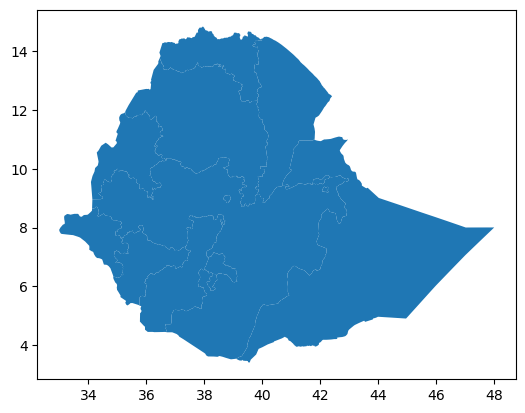

In [35]:
idp_by_region.plot()